In [43]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [44]:
 
from Bio import SeqIO                             #Imports the seq Input/Output from Biopython
from Bio.Data import CodonTable                   #Imports codon table Library from NCBI for translating
import pandas as pd                               # Imports Pandas software and namedtagged as "pd"
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Seq import Seq
from Bio.Seq import translate
import seaborn as sns
import matplotlib.pyplot as plt


FUNCTIONS

Function 1: To Get sequences

 Description: This function pulls sequence data and returns species names and sequence data from FASTA file.
 
 Argument: fasta_fn - This file contains sequences in FASTA format.
 
 Return : A dictionary of the sequence data containing the species name for the different species found in the .fasta file
 


In [45]:
def get_sequences_from_file(fasta_fn):             # This defines a new function
    sequence_data_dict = {}                        # This creates an empty dictionary/variable
    for record in SeqIO.parse(fasta_fn, "fasta"):  #  This starts a loop through a fasta file, using built-in biopython function
        description = record.description.split()   # This splits entries by space and store in adefined variable
        species_name = description[1] + " " + description[2]    # This names each species from fasta file
        sequence_data_dict[species_name] = record.seq           # This assigns sequence to corresponding species name
    return(sequence_data_dict)                                  # This returns dictionary with species as key and sequences

   

Function 2

YOUR STRING-TRANSLATE FUNCTION 

Write a function that trnaslates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion

Description: This trnaslates DNA sequences into amino acid sequence using the vertebrate mitochondrial codon table.

Arguments: string_nucleotides : A string of nucleotides to be translated

Return: Amino acid seuqnce string, This contains translated amino acid sequences.


In [46]:
def translate_seq_Nt_to_AA(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]    #This defines the codon table to be used.
    aa_seq_string = ''              #This creates an Empty string for the amino acid sequence.
    
    for i in range(0, len(string_nucleotides), 3):  # This loops through every 3rd position
        codon = string_nucleotides[i:i + 3]         # To get the exact codon at the position i
        if codon in mito_table.stop_codons:         
            break
        aa = mito_table.forward_table[codon]        # Translates codons into amino acids
        aa_seq_string += aa
    return aa_seq_string                            #This returns amino acid sequence
    


Function 3

YOUR ALTERNATIVE FUNCTION : Writing an alternative way to translate the function.

Description: Translates a DNA sequence into an amino acid sequence using Biopython 

Arguments: string_nucleotides (str): The nucleotide sequence to be translated.

Returns: This returns the translated amino acid sequence


In [47]:
def translation(string_nucleotides):
 
    Translated_seq = str(Seq(string_nucleotides).translate(table="Vertebrate Mitochondrial"))
    
    return Translated_seq

Function 4

OUR COUNT AA ANALYSIS FUNCTION 

Description: To calculate the molecular weight of each amino acid sequence

Arguments: aa_seq (str): A string representing the amino acid sequence of the protein.

Return: Float, The molecular weight of the protein calculated using the Protein Analysis class from Biopython.

In [48]:
def compute_molecular_weight(aa_seq):
    
    Analysis = ProteinAnalysis(aa_seq[:-1]) 
    
    return Analysis.molecular_weight()

Function 5

YOUR GC CONTENT ANALYSIS FUNCTION

Description: This calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.
    
Arguments: dna_seq (str): A string representing the DNA sequence.
    
Return: float: The GC content of the DNA sequence as a percentage.

In [49]:

  def gcpercent(dna_seq):

    count_g = dna_seq.count('G')
    count_c = dna_seq.count('C')
    countGC = count_g + count_c
    dnalen = len(dna_seq)
    gc_percent = countGC/dnalen * 100
    return gc_percent

MAIN

In [50]:
cytb_seqs = get_sequences_from_file("/home/ejoko/BCB546_Spring2024/assignments/Python_Assignment/BCB546-PythonHW_Spring2024/penguins_cytb.fasta") 

penguins_df = pd.read_csv("/home/ejoko/BCB546_Spring2024/assignments/Python_Assignment/BCB546-PythonHW_Spring2024/penguins_mass.csv") 

species_list = list(penguins_df.species)


6. Add two new columns to the penguin DataFrame : (1) Molecular weight and (2) GC content

In [51]:
# Set the value to 'NaN' to indicate that these cells are currently empty.

penguins_df['molecular_weight'] = float('NaN')     # This initializes new column molecular weight with NaN values

penguins_df['GC_content'] = float('NaN')           # This initializes new column GC_content with NaN values

(penguins_df.head())                               # This checks if the output is right

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN


7. Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame


In [52]:
for key, value in cytb_seqs.items():
    aa_seq = translation(str(value))             # Translate using translation function from Step 3.
    MW = compute_molecular_weight(aa_seq)        # Calculate molecular weight
    GC_content = gcpercent(str(value))           # Calculate GC content

    # Update DataFrame with calculated values
    penguins_df.loc[penguins_df['species'] == key, 'molecular_weight'] = MW
    penguins_df.loc[penguins_df['species'] == key, 'GC_content'] = GC_content
    
penguins_df.head()

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6021,48.381452
1,Aptenodytes patagonicus,13.40,42563.7067,49.693788
2,Eudyptes chrysocome,2.80,42475.5753,51.181102
3,Eudyptes chrysolophus,4.50,42445.5493,50.918635
4,Eudyptes sclateri,4.25,42475.5753,50.831146


8. Plot a bar-chart of the mass with the x-axes labeled with species names.

I. What is the smallest penguin species.
II. What is the geographical range of this species

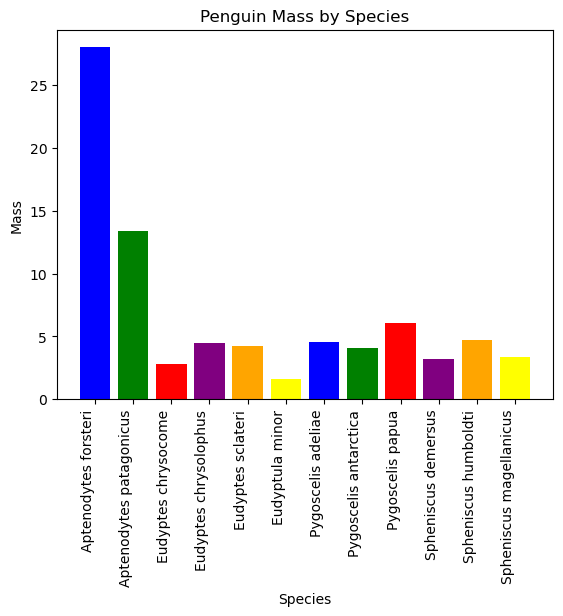

In [54]:

# To define a list of colors for each bar
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow']

# To create bar plot with each bar in a different color
plt.bar(penguins_df["species"], penguins_df["mass"], color=colors)


plt.xlabel('Species')                                  #This sets the x-axis of the plot
plt.ylabel('Mass')                                     #This sets the y-axis of the plot
plt.title('Penguin Mass by Species')                   #This sets the title of the plot
plt.xticks(rotation=90, ha='right')                    #This sets the appearance and rotates the tick labels by 90 degrees to improve readability.
plt.show()                                             #This displays the plot

In [55]:
#This finds the penguin species with the smallest mass in the dataframe.

smallest_species = penguins_df.loc[penguins_df['mass'].idxmin(), 'species']
print("The smallest penguin species is:", smallest_species)


The smallest penguin species is: Eudyptula minor


Q2. What is the geographical range of this species.

Eudyptula minor is found in the coastal waters os Southern mainland Australia and Tasmania.

It is also found to be widespread along the coasts of New Zealand, particularly in the South Island and the North Island. 

The Australian taxon is known to feed predominantly within 30 km of its nests during the chick rearing stage (Hoskins et al. 2008; Agnew 2014; Pelletier et al. 2014), as does the New Zealand taxon (Mattern et al. 2001; Zhang et al. 2015). 


9. Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis)

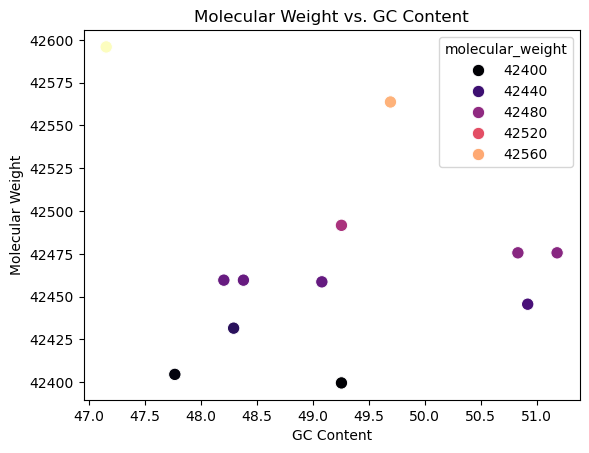

In [60]:

sns.set_palette("magma")   # Set Seaborn style and color palette

# This creates a scatter plot
sns.scatterplot(data=penguins_df, x='GC_content', y='molecular_weight', hue='molecular_weight', palette='magma', s=80)

# This sets the  labels and title
plt.xlabel('GC Content')
plt.ylabel('Molecular Weight')
plt.title('Molecular Weight vs. GC Content')

# This shows the plot
plt.show()

10. Write the entire DataFrame to a new CSV file that includes your new columns

In [219]:
#This exports the Data frame 'penguins_df' to a CSV file named "Penguins_mass_cytb.csv"
penguins_df.to_csv('penguins_mass_cytb.csv', index=False)

BONUS

11.  What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun

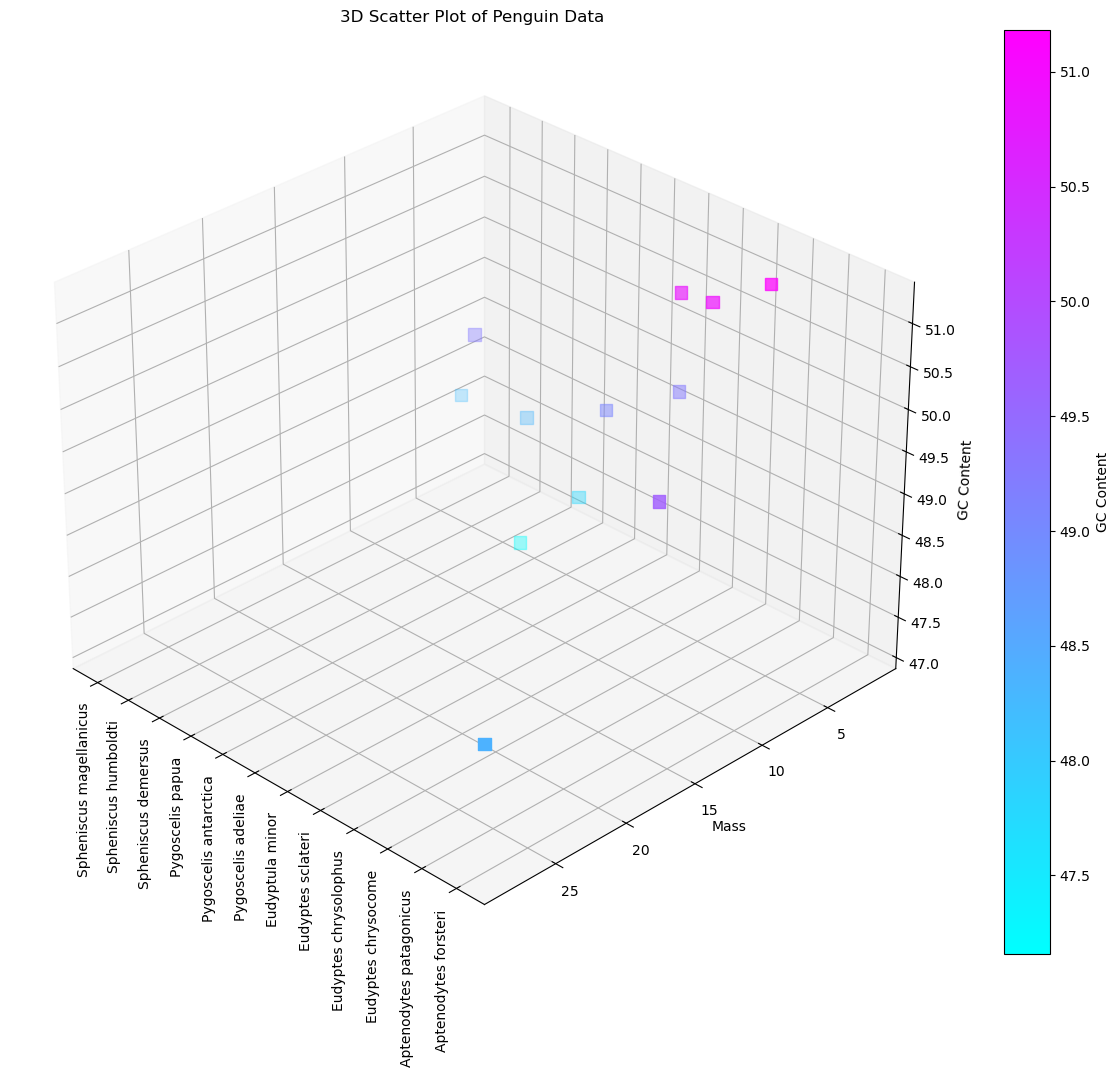

In [59]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Extracting data from DataFrame
species = penguins_df['species']
mass = penguins_df['mass']
gc_content = penguins_df['GC_content']

# Assign numeric indices to species
species_indices = range(len(species))

# Create a figure and a 3D axes
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D scatter plot with a different color map
scatter = ax.scatter(species_indices, mass, gc_content, c=gc_content, cmap='cool', s=80, marker='s')

# Setting x-axis tick labels to species names
ax.set_xticks(species_indices)
ax.set_xticklabels(species, rotation=90)

# Labels and Titles

ax.set_ylabel('Mass')
ax.set_zlabel('GC Content')
ax.set_title('3D Scatter Plot of Penguin Data')

# Rotating the plot for better visibility
ax.view_init(30, 135)

# Show the color bar
plt.colorbar(scatter, label='GC Content')

# Show the plot
plt.show()

